# **HW1: Regression**
In *assignment 1*, you need to finish:

1.  Basic Part: Implement two regression models to predict the Systolic blood pressure (SBP) of a patient. You will need to implement **both Matrix Inversion and Gradient Descent**.


> *   Step 1: Split Data
> *   Step 2: Preprocess Data
> *   Step 3: Implement Regression
> *   Step 4: Make Prediction
> *   Step 5: Train Model and Generate Result

2.  Advanced Part: Implement one regression model to predict the SBP of multiple patients in a different way than the basic part. You can choose **either** of the two methods for this part.

# **1. Basic Part (55%)**
In the first part, you need to implement the regression to predict SBP from the given DBP


## 1.1 Matrix Inversion Method (25%)


*   Save the prediction result in a csv file **hw1_basic_mi.csv**
*   Print your coefficient


### *Import Packages*

> Note: You **cannot** import any other package

In [888]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import math
import random

### *Global attributes*
Define the global attributes

In [889]:
training_dataroot = 'hw1_basic_training.csv' # Training data file file named as 'hw1_basic_training.csv'
testing_dataroot = 'hw1_basic_testing.csv'   # Testing data file named as 'hw1_basic_training.csv'
output_dataroot = 'hw1_basic_mi.csv' # Output file will be named as 'hw1_basic.csv'

training_datalist =  [] # Training datalist, saved as numpy array
testing_datalist =  [] # Testing datalist, saved as numpy array

output_datalist =  [] # Your prediction, should be 20 * 3 matrix and saved as numpy array
                      # The format of each row should be ['subject_id', 'charttime', 'sbp']

You can add your own global attributes here


In [890]:
# Over 2 times of standard deviation would be remove
outlierStd = 2
# Take 90% of data in training, 10% in validation
trainingDataRatio = 0.9

def mape(w ,predict, source):
    print((np.abs(w[0]+w[1]*source - predict) / source).sum() / source.shape[0])

### *Load the Input File*
First, load the basic input file **hw1_basic_training.csv** and **hw1_basic_testing.csv**

Input data would be stored in *training_datalist* and *testing_datalist*

In [891]:
# Read input csv to datalist
with open(training_dataroot, newline='') as csvfile:
  training_datalist = np.array(list(csv.reader(csvfile)))

with open(testing_dataroot, newline='') as csvfile:
  testing_datalist = np.array(list(csv.reader(csvfile)))

### *Implement the Regression Model*

> Note: It is recommended to use the functions we defined, you can also define your own functions


#### Step 1: Split Data
Split data in *training_datalist* into training dataset and validation dataset
* Validation dataset is used to validate your own model without the testing data



In [892]:
def SplitData():
    trainingDataset = training_datalist[1:].astype('int')
    r, c = trainingDataset.shape
    trainNum = round(r*trainingDataRatio)
    np.random.shuffle(trainingDataset)
    trainingDataset, validationDataset = trainingDataset[:trainNum,:], trainingDataset[trainNum:,:]
    return trainingDataset, validationDataset
testingDataset = testing_datalist[1:].astype('int')
trainingDataset, validationDataset = SplitData()


#### Step 2: Preprocess Data
Handle the unreasonable data
> Hint: Outlier and missing data can be handled by removing the data or adding the values with the help of statistics  

In [893]:
def PreprocessData():
    xMean = np.mean(trainingDataset[:,0])
    yMean = np.mean(trainingDataset[:,1])
    xStd = np.std(trainingDataset[:,0])
    yStd = np.std(trainingDataset[:,1])
    outliers = np.logical_and((abs(trainingDataset[:,0] - xMean) < outlierStd * xStd) , (abs(trainingDataset[:,1] - yMean) < outlierStd * yStd))
    return trainingDataset[outliers]
trainingDatasetRemoveOutlier = PreprocessData()

#### Step 3: Implement Regression
> use Matrix Inversion to finish this part




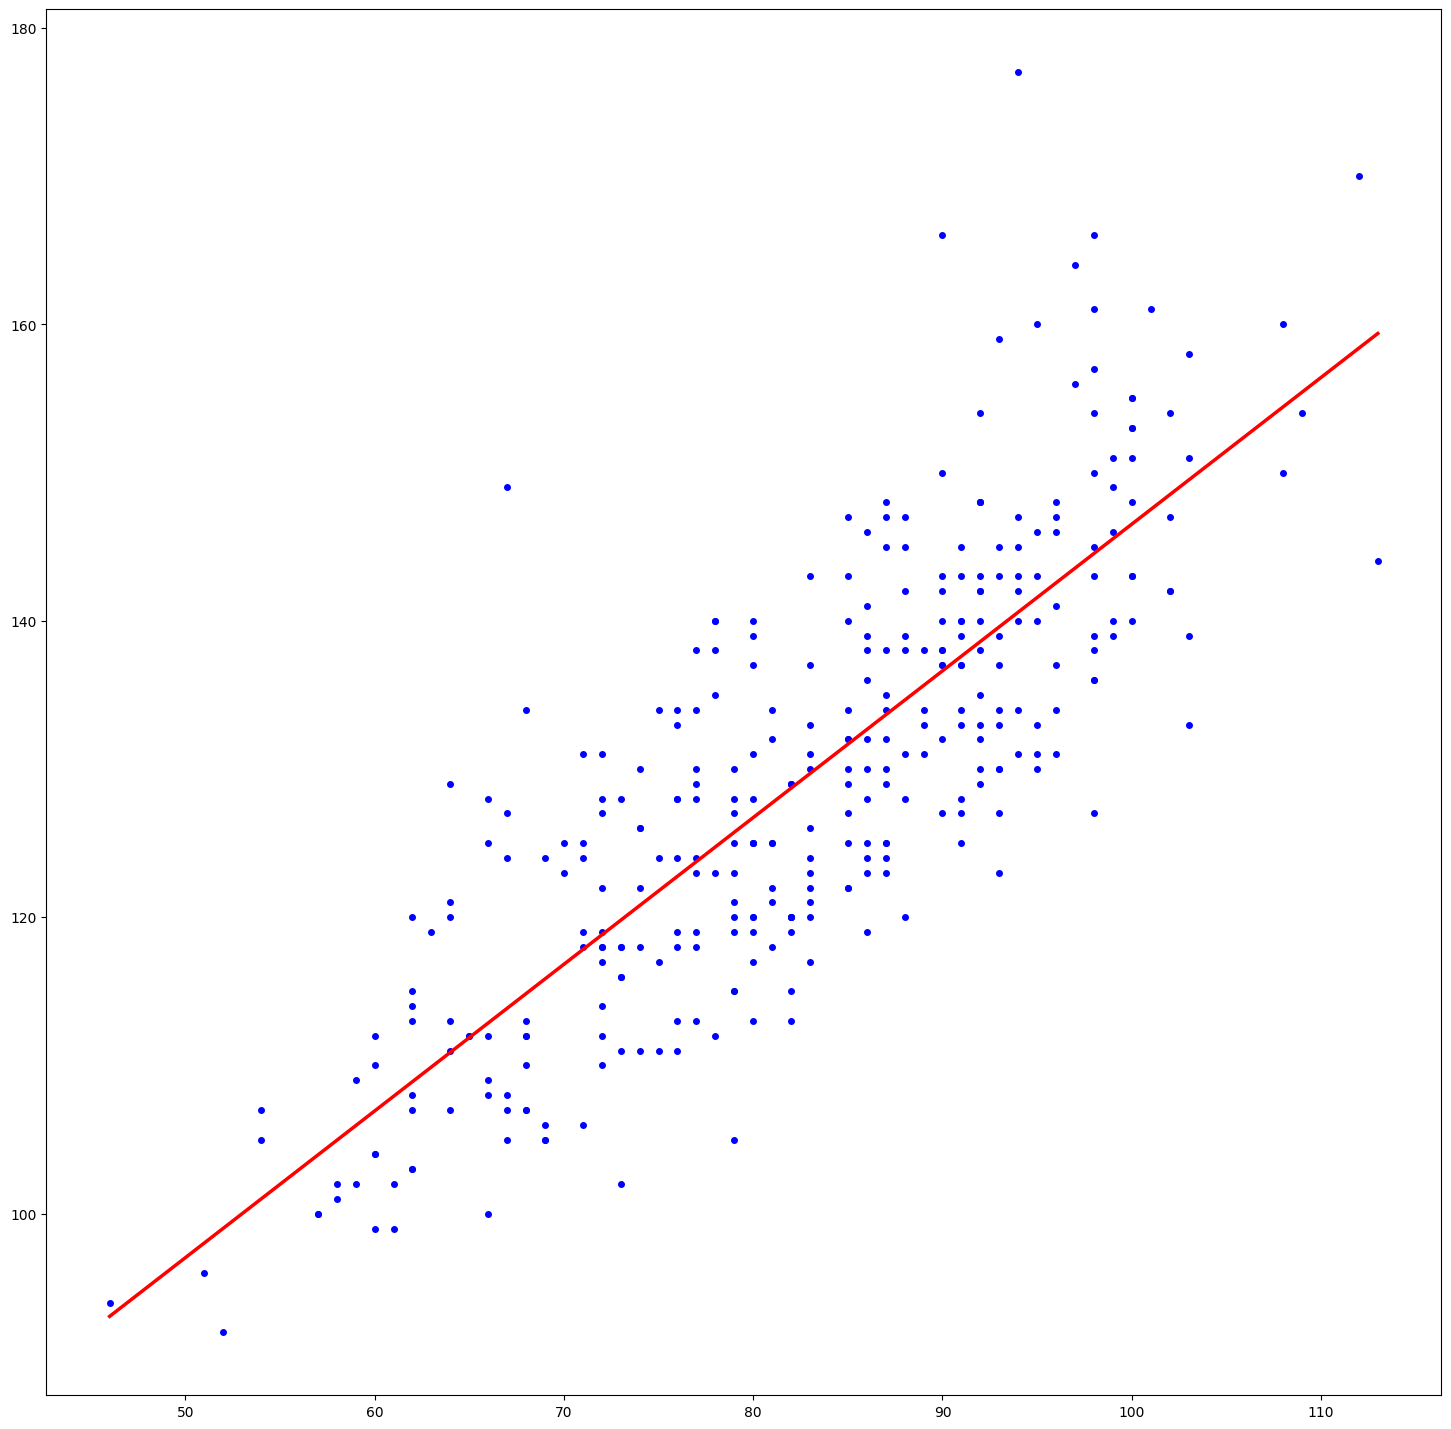

In [894]:
def MatrixInversion():
    W = np.c_[np.ones((trainingDatasetRemoveOutlier.shape[0], 1)), trainingDatasetRemoveOutlier[:,0]]
    weights = np.linalg.inv(W.T.dot(W)).dot(W.T).dot(trainingDatasetRemoveOutlier[:,1])
    return weights

weights = MatrixInversion()
# Draw the regression line

x = np.linspace(trainingDatasetRemoveOutlier[:,0].min(), trainingDatasetRemoveOutlier[:,0].max(), 1000)
plt.plot(trainingDatasetRemoveOutlier[:,0],trainingDatasetRemoveOutlier[:,1],'bo',markersize=4)
plt.plot(x, weights[0]+weights[1]*x,color='red', linewidth=2.5)
plt.show()

#### Step 4: Make Prediction
Make prediction of testing dataset and store the value in *output_datalist*
The final *output_datalist* should look something like this 
> [ [100], [80], ... , [90] ] where each row contains the predicted SBP

In [895]:
def MakePrediction():
    return (weights[0]+testingDataset[:,0]*weights[1]).reshape(testingDataset.shape[0],1)
output_datalist = MakePrediction()

#### Step 5: Train Model and Generate Result

> Notice: **Remember to output the coefficients of the model here**, otherwise 5 points would be deducted
* If your regression model is *3x^2 + 2x^1 + 1*, your output would be:
```
3 2 1
```





In [896]:
print(weights[1], weights[0])

0.989655002940066 47.54908717516654


### *Write the Output File*
Write the prediction to output csv
> Format: 'sbp'




In [897]:
with open(output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  for row in output_datalist:
    writer.writerow(row)

## 1.2 Gradient Descent Method (30%)


*   Save the prediction result in a csv file **hw1_basic_gd.csv**
*   Output your coefficient update in a csv file **hw1_basic_coefficient.csv**
*   Print your coefficient





### *Global attributes*

In [898]:
output_dataroot = 'hw1_basic_gd.csv' # Output file will be named as 'hw1_basic.csv'
coefficient_output_dataroot = 'hw1_basic_coefficient.csv'

training_datalist =  [] # Training datalist, saved as numpy array
testing_datalist =  [] # Testing datalist, saved as numpy array

output_datalist =  [] # Your prediction, should be 20 * 3 matrix and saved as numpy array
                      # The format of each row should be ['subject_id', 'charttime', 'sbp']

coefficient_output = [] # Your coefficient update during gradient descent
                   # Should be a (number of iterations * number_of coefficient) matrix
                   # The format of each row should be ['w0', 'w1', ...., 'wn']

### *Load the Input File*
First, load the basic input file **hw1_basic_training.csv** and **hw1_basic_testing.csv**

Input data would be stored in *training_datalist* and *testing_datalist*

In [899]:
# Read input csv to datalist
with open(training_dataroot, newline='') as csvfile:
  training_datalist = np.array(list(csv.reader(csvfile)))

with open(testing_dataroot, newline='') as csvfile:
  testing_datalist = np.array(list(csv.reader(csvfile)))

Your own global attributes

In [900]:
# Over 2 times of standard deviation would be remove
outlierStd = 2
# Gradient descent parameter


### *Implement the Regression Model*


#### Step 1: Split Data

In [901]:
testingDataset = testing_datalist[1:].astype('int')
trainingDataset, validationDataset = SplitData()

#### Step 2: Preprocess Data

In [902]:
trainingDatasetRemoveOutlier = PreprocessData()


#### Step 3: Implement Regression
> use Gradient Descent to finish this part

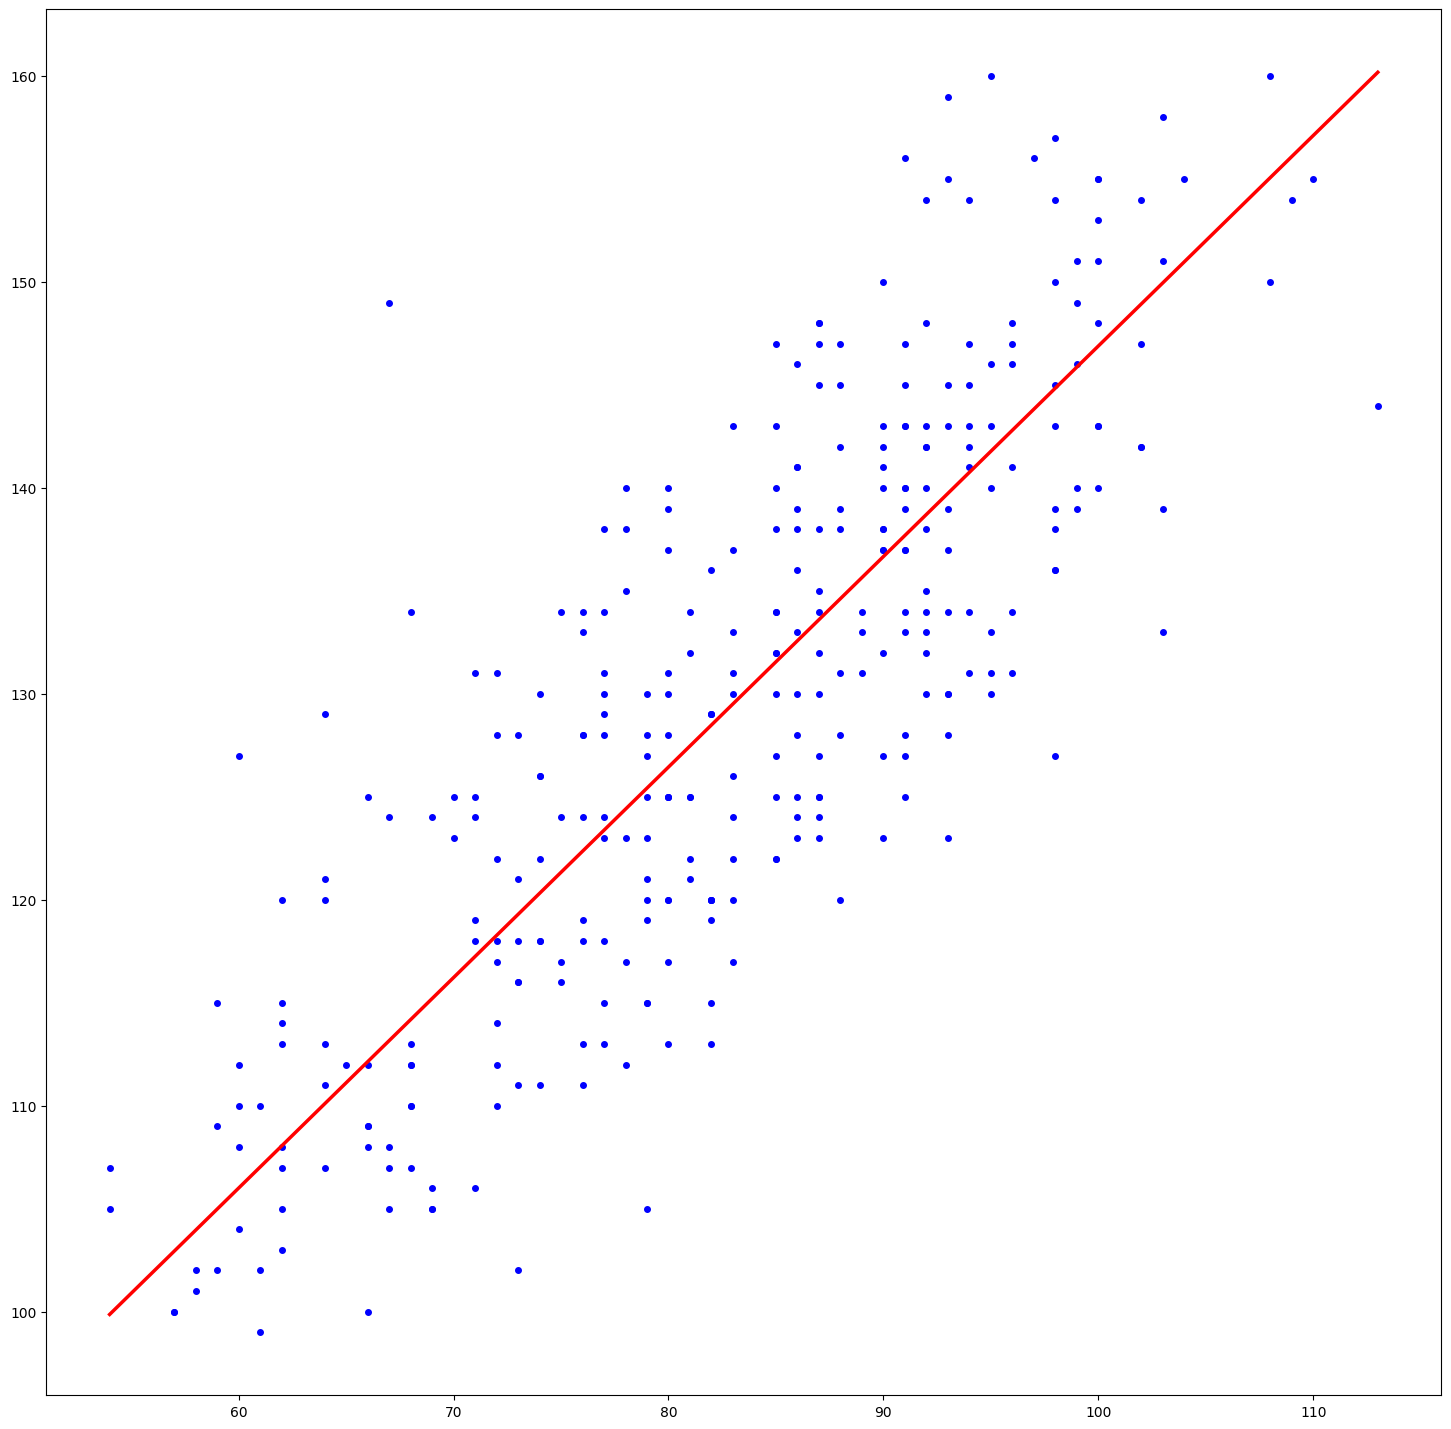

0.08716473690727522


In [913]:
def GradientDescent():
    rate=0.0001
    iterations = 1000000
    m = trainingDatasetRemoveOutlier.shape[0]
    weights = np.random.randn(2)
    x = trainingDatasetRemoveOutlier[:,0]
    x = np.c_[np.ones((m, 1)), x]
    y = trainingDatasetRemoveOutlier[:,1]
    for i in range(0,iterations):
        gradients = 1/m * x.T.dot(x.dot(weights) - y)
        weights = weights - rate * gradients
    return weights
weights = GradientDescent()
x = np.linspace(trainingDatasetRemoveOutlier[:,0].min(), trainingDatasetRemoveOutlier[:,0].max(), 1000)
plt.plot(trainingDatasetRemoveOutlier[:,0],trainingDatasetRemoveOutlier[:,1],'bo',markersize=4)
plt.plot(x, weights[0]+weights[1]*x,color='red', linewidth=2.5)
plt.show()

#### Step 4: Make Prediction

Make prediction of testing dataset and store the values in *output_datalist*
The final *output_datalist* should look something like this 
> [ [100], [80], ... , [90] ] where each row contains the predicted SBP

Remember to also store your coefficient update in *coefficient_output*
The final *coefficient_output* should look something like this
> [ [1, 0, 3, 5], ... , [0.1, 0.3, 0.2, 0.5] ] where each row contains the [w0, w1, ..., wn] of your coefficient





In [904]:
def MakePrediction():
    return (weights[0]+testingDataset[:,0]*weights[1]).reshape(testingDataset.shape[0],1)
output_datalist = MakePrediction()

#### Step 5: Train Model and Generate Result

> Notice: **Remember to output the coefficients of the model here**, otherwise 5 points would be deducted
* If your regression model is *3x^2 + 2x^1 + 1*, your output would be:
```
3 2 1
```



In [905]:
print(weights[1], weights[0])

1.0236501475556155 44.549132889039804


### *Write the Output File*

Write the prediction to output csv
> Format: 'sbp'

**Write the coefficient update to csv**
> Format: 'w0', 'w1', ..., 'wn'
>*   The number of columns is based on your number of coefficient
>*   The number of row is based on your number of iterations

In [906]:
with open(output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  for row in output_datalist:
    writer.writerow(row)

with open(coefficient_output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  for row in coefficient_output:
    writer.writerow(row)

# **2. Advanced Part (40%)**
In the second part, you need to implement the regression in a different way than the basic part to help your predictions of multiple patients SBP.

You can choose **either** Matrix Inversion or Gradient Descent method.

The training data will be in **hw1_advanced_training.csv** and the testing data will be in **hw1_advanced_testing.csv**.

Output your prediction in **hw1_advanced.csv**

Notice:
> You cannot import any other package other than those given



### Input the training and testing dataset

In [907]:
training_dataroot = 'hw1_advanced_training.csv' # Training data file file named as 'hw1_basic_training.csv'
testing_dataroot = 'hw1_advanced_testing.csv'   # Testing data file named as 'hw1_basic_training.csv'
output_dataroot = 'hw1_advanced.csv' # Output file will be named as 'hw1_basic.csv'

training_datalist =  [] # Training datalist, saved as numpy array
testing_datalist =  [] # Testing datalist, saved as numpy array

output_datalist =  [] # Your prediction, should be 220 * 1 matrix and saved as numpy array
                      # The format of each row should be ['sbp']

### Your Implementation

### Read file

In [908]:
with open(training_dataroot, newline='') as csvfile:
    training_datalist = np.array(list(csv.reader(csvfile)))

with open(testing_dataroot, newline='') as csvfile:
    testing_datalist = np.array(list(csv.reader(csvfile)))

In [909]:
# Miss over 1 data would be removed
acceptMissingDataNum = 6

[98.6  0.  97.8 ... 99.1 99.8 98.7]


### Output your Prediction

> your filename should be **hw1_advanced.csv**

In [911]:
with open(output_dataroot, 'w', newline='', encoding="utf-8") as csvfile:
  writer = csv.writer(csvfile)
  for row in output_datalist:
    writer.writerow(row)

# Report *(5%)*

Report should be submitted as a pdf file **hw1_report.pdf**

*   Briefly describe the difficulty you encountered
*   Summarize your work and your reflections
*   No more than one page






# Save the Code File
Please save your code and submit it as an ipynb file! (**hw1.ipynb**)